<a href="https://colab.research.google.com/github/MUbarak123-56/fast-ai/blob/master/chapter6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 93.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
from fastai.vision.all import *
path = untar_data(URLs.PASCAL_2007)

In [4]:
import pandas as pd

## Multi-Label Classification

In [5]:
df = pd.read_csv(path/"train.csv")
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [6]:
df.iloc[:,0]

0       000005.jpg
1       000007.jpg
2       000009.jpg
3       000012.jpg
4       000016.jpg
           ...    
5006    009954.jpg
5007    009955.jpg
5008    009958.jpg
5009    009959.jpg
5010    009961.jpg
Name: fname, Length: 5011, dtype: object

In [7]:
df.iloc[0,:]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [8]:
df.iloc[0]

fname       000005.jpg
labels           chair
is_valid          True
Name: 0, dtype: object

In [9]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/valid.json'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/test')]

In [10]:
dblock = DataBlock()

In [11]:
dsets = dblock.datasets(df)

In [12]:
dsets.train[0]

(fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object, fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object)

In [13]:
dblock = DataBlock(get_x = lambda r: r['fname'], get_y = lambda r: r['labels'])
dsets = dblock.datasets(df)
dsets.train[0]

('005620.jpg', 'aeroplane')

In [14]:
def get_x(r):
  return path/'train'/r['fname']

def get_y(r):
  return r['labels'].split(' ')

In [15]:
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[10]

(Path('/root/.fastai/data/pascal_2007/train/006046.jpg'), ['boat'])

In [16]:
dsets.train[1]

(Path('/root/.fastai/data/pascal_2007/train/005378.jpg'), ['chair'])

In [17]:
dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    get_x = get_x,
    get_y = get_y
)

In [18]:
dsets = dblock.datasets(df)

In [19]:
dsets.train[0]

(PILImage mode=RGB size=500x325,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [20]:
idxs = torch.where(dsets.train[1][1]==1.)[0]
dsets.train.vocab[idxs]

(#3) ['car','motorbike','person']

In [21]:
def splitter(df):
  train = df.index[~df['is_valid']].tolist()
  valid = df.index[df['is_valid']].tolist()
  return train, valid

In [22]:
dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    splitter = splitter,
    get_x = get_x,
    get_y = get_y
)

In [23]:
dsets = dblock.datasets(df)

In [24]:
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [25]:
dblock = DataBlock(
    blocks = (ImageBlock, MultiCategoryBlock),
    splitter = splitter,
    get_x = get_x,
    get_y = get_y,
    item_tfms = RandomResizedCrop(128, min_scale=0.35)
    #batch_tfms = aug_transforms()
)

In [26]:
dls = dblock.dataloaders(df)

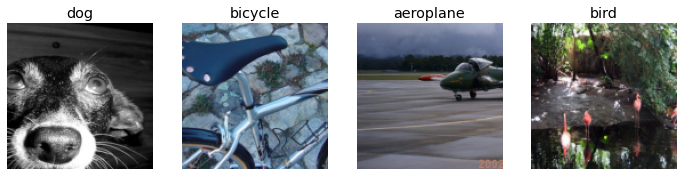

In [27]:
dls.show_batch(nrows = 1, ncols = 4)

In [28]:
learn = cnn_learner(dls, resnet18)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pt

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [32]:
x, y = dls.train.one_batch()
x = x.to(device = "cuda")
y = y.to(device = "cuda")
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [33]:
activs[0]

TensorBase([-6.8738, -5.8432, -6.5244, -7.3352, -1.1261, -6.7935, -5.2116, -5.2293, -0.0807, -6.9648, -3.0858, -4.2252, -6.3017, -5.7307,  7.7023, -3.1213, -6.5958, -1.8606, -7.6756, -3.6178],
           device='cuda:0', grad_fn=<AliasBackward0>)

In [34]:
def binary_cross_entropy(inputs, targets):
  inputs = inputs.sigmoid()
  return -torch.where(targets==1, 1 - inputs, inputs).log().mean()

In [35]:
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs, y)
loss

TensorMultiCategory(0.0612, device='cuda:0', grad_fn=<AliasBackward0>)

In [36]:
def accuracy(inp, targ, axis = -1):
  pred = inp.argmax(dim = axis)
  return (pred == targ).float().mean()

In [37]:
def accuracy_multi(inp, targ, thresh = 0.5, sigmoid = True):
  if sigmoid:
    inp = inp.sigmoid()
  return ((inp > thresh) == targ.bool()).float().mean()

In [38]:
learn = cnn_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh = 0.2))
learn.fine_tune(3, base_lr = 3e-3, freeze_epochs = 4)

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.943217,0.712495,0.224243,00:08
1,0.822195,0.561373,0.282371,00:08
2,0.603863,0.206392,0.812630,00:08
3,0.359908,0.128782,0.936215,00:08


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.130922,0.118550,0.940140,00:08
1,0.115179,0.106667,0.949602,00:08
2,0.095932,0.103238,0.951932,00:08


In [39]:
learn.metrics = partial(accuracy_multi, thresh = 0.1)
learn.validate()

(#2) [0.10323753952980042,0.9300001263618469]

In [40]:
learn.metrics = partial(accuracy_multi, thresh = 0.99)
learn.validate()

(#2) [0.10323753952980042,0.9426295757293701]

In [41]:
preds, targs = learn.get_preds()

In [42]:
accuracy_multi(preds, targs, thresh = 0.9, sigmoid = False)

TensorBase(0.9564)

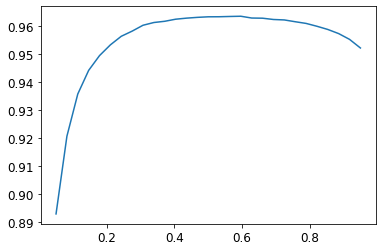

In [43]:
xs = torch.linspace(0.05,0.95, 29)
accs = [accuracy_multi(preds, targs, thresh = i, sigmoid = False) for i in xs]
plt.plot(xs, accs);

## Regression

In [44]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [45]:
path.ls()

(#50) [Path('/root/.fastai/data/biwi_head_pose/09'),Path('/root/.fastai/data/biwi_head_pose/23'),Path('/root/.fastai/data/biwi_head_pose/03'),Path('/root/.fastai/data/biwi_head_pose/10'),Path('/root/.fastai/data/biwi_head_pose/11.obj'),Path('/root/.fastai/data/biwi_head_pose/06'),Path('/root/.fastai/data/biwi_head_pose/06.obj'),Path('/root/.fastai/data/biwi_head_pose/13'),Path('/root/.fastai/data/biwi_head_pose/10.obj'),Path('/root/.fastai/data/biwi_head_pose/16')...]

In [46]:
(path/"01").ls()

(#1000) [Path('/root/.fastai/data/biwi_head_pose/01/frame_00034_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00340_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00140_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00427_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00188_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00325_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00170_pose.txt'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00307_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00396_rgb.jpg'),Path('/root/.fastai/data/biwi_head_pose/01/frame_00216_pose.txt')...]

In [50]:
img_files = get_image_files(path)
def img2pose(x):
  return Path(f"{str(x)[:-7]}pose.txt")
img2pose(img_files[0])

Path('/root/.fastai/data/biwi_head_pose/09/frame_00034_pose.txt')

In [51]:
im = PILImage.create(img_files[0])
im.shape

(480, 640)

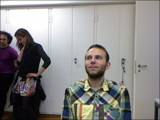

In [53]:
im.to_thumb(160)

In [54]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6)
def get_ctr(f):
    ctr = np.genfromtxt(img2pose(f), skip_header=3)
    c1 = ctr[0] * cal[0][0]/ctr[2] + cal[0][2]
    c2 = ctr[1] * cal[1][1]/ctr[2] + cal[1][2]
    return tensor([c1,c2])

In [55]:
get_ctr(img_files[0])

tensor([384.0818, 245.0742])

In [56]:
biwi = DataBlock(
    blocks = (ImageBlock, PointBlock),
    get_items = get_image_files,
    get_y = get_ctr,
    splitter = FuncSplitter(lambda o: o.parent.name == "13"),
    batch_tfms = [*aug_transforms(size = (240,320)),
                  Normalize.from_stats(*imagenet_stats)]
)

In [57]:
dls = biwi.dataloaders(path)

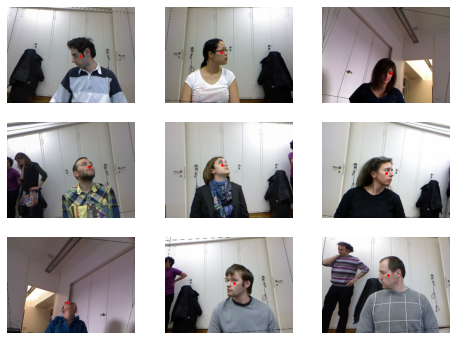

In [58]:
dls.show_batch(max_n = 9, figsize = (8,6))

In [60]:
xb, yb = dls.one_batch()
xb.shape, yb.shape

(torch.Size([64, 3, 240, 320]), torch.Size([64, 1, 2]))

In [61]:
yb[0]

TensorPoint([[0.0605, 0.0743]], device='cuda:0')

In [62]:
learn = cnn_learner(dls, resnet18, y_range = (-1,1))

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [63]:
def sigmoid_range(x, lo, hi):
  return torch.sigmoid(x) * (hi - lo) + lo

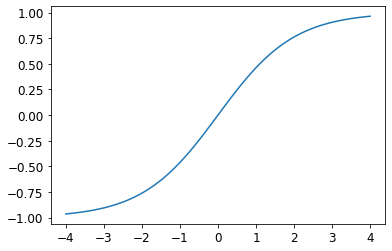

In [65]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4, max=4)

In [66]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(valley=0.0012022644514217973)

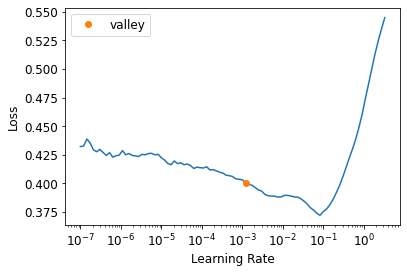

In [67]:
learn.lr_find()

In [68]:
lr = 1e-3
learn.fine_tune(3, lr)

epoch,train_loss,valid_loss,time
0,0.228995,0.026939,00:25


epoch,train_loss,valid_loss,time
0,0.081858,0.007230,00:27
1,0.017691,0.000656,00:27
2,0.009827,0.001159,00:27


In [69]:
math.sqrt(0.0001)

0.01

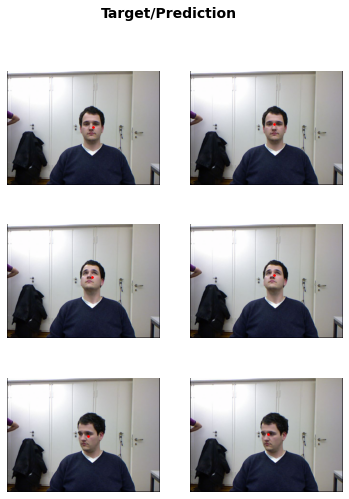

In [70]:
learn.show_results(ds_idx = 1, max_n = 3, figsize=(6,8))